**DS 301: Applied Data Modeling and Predictive Analysis**

# Lab 04 – Logistic Regression Classifier

## 1. Load data and prepare X and y

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.datasets import load_iris

X, y = load_iris(return_X_y=True)
X = X[:, :2]
idx = np.argwhere(y == 2)
X = np.delete(X, idx, axis=0)
y = np.delete(y, idx)
print(X.shape, y.shape)

(100, 2) (100,)


**Task 1:** Use scikit-learn to train your with LogisticRegression. Report the training accuracy. [10 points]

In [2]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

lg = LogisticRegression()
lg.fit(x_train, y_train)

score = lg.score(x_test, y_test)
print(score)

1.0


**Task 2:** Use matplotlib to visualize the data. Use the first feature as x-axis and the second feature as y-axis and assign different colors for data with different labels. Also plot your model decision boundary. [10 points]

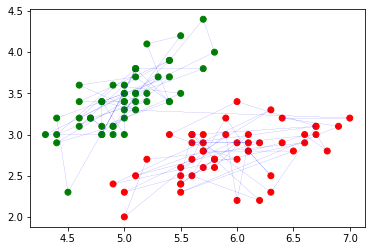

In [3]:
# Take first column
xAxis = X[:,0]
# Take second column
yAxis = X[:,1]

ySeries = pd.Series(y)
colors = {0: 'green', 1: 'red'}

plt.scatter(xAxis, yAxis, c=ySeries.map(colors))
plt.plot(xAxis, yAxis, color = 'blue', linewidth=0.1, animated=True)
plt.show()

**Task 3:** Change the decision threshold from 0.5 to 0.8 and report your training accuracy. Redraw the figure in task 2 (features and decision boundary). [10 points]

In [4]:
from sklearn import metrics
from sklearn.metrics import precision_recall_curve

y_pred2 = (lg.predict_proba(x_test)[:,1] >= 0.8).astype(int)

precision, recall , thresholds = precision_recall_curve(y_test, y_pred2)

score = lg.score(x_test, y_pred2)
print(score)

0.9


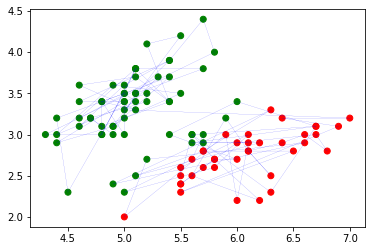

In [5]:
y_pred2 = (lg.predict_proba(X)[:,1] >= 0.8).astype(int)

ySeries = pd.Series(y_pred2)
colors = {0: 'green', 1: 'red'}


plt.scatter(xAxis, yAxis, c=ySeries.map(colors))
plt.plot(xAxis, yAxis, color = 'blue', linewidth=0.1, animated=True)
plt.show()